In [1]:
import pandas as pd

from os import path
import sys
sys.path.append(path.abspath('/mnt/B6C8BAECC8BAAA4F/André/UC/Tese/MScThesis/Graphy'))

import graphy
from graphy.db import opentsdb
from graphy.utils import zipkin

In [2]:
service_names = zipkin.get_services()

service_names

['api_com',
 'apig_console',
 'batch_console',
 'cinder-api-cascaded',
 'cinder-scheduler-cascaded',
 'cinder-volume-cascaded',
 'cluster-manager',
 'evs',
 'hss',
 'mysql',
 'neutron-server-cascaded',
 'neutron-server-cascading',
 'nova-api-cascaded',
 'nova-api-cascading',
 'nova-compute-cascaded',
 'nova-conductor-cascaded',
 'nova-scheduler-cascaded',
 'vpc-service']

In [3]:
start_timestamp = 1530057600     # 27.06.2018 00:00:00
end_timestamp = 1530316800       # 30.06.2018 00:00:00

metric_pre_name = 'huawei'

metric_single_type = ['graph_variance', 'graph_gain_variance', 'graph_loss_variance']

metric_double_types = ['call_count', 'call_count_in', 'call_count_out', 
                         'response_time_avg', 
                         'degree', 'degree_in', 'degree_out']

metric_status_code = 'status_code'

metric_triple_types_1 = ['1XX', '2XX', '3XX', '4XX', '5XX']

metric_names = list()

# Single param metric
for metric_type in metric_single_type:
    metric_names.append('{}.{}'.format(metric_pre_name, metric_type))

# Double param metric
for service_name in service_names:
    for metric_type in metric_double_types:
        metric_names.append('{}.{}.{}'.format(metric_pre_name, metric_type, service_name))
        

# Triple param metric
for service_name in service_names:
    for metric_type in metric_triple_types_1:
        metric_names.append('{}.{}.{}.{}'.format(metric_pre_name, metric_status_code, service_name, metric_type))
                
metric_names

['huawei.graph_variance',
 'huawei.graph_gain_variance',
 'huawei.graph_loss_variance',
 'huawei.call_count.api_com',
 'huawei.call_count_in.api_com',
 'huawei.call_count_out.api_com',
 'huawei.response_time_avg.api_com',
 'huawei.degree.api_com',
 'huawei.degree_in.api_com',
 'huawei.degree_out.api_com',
 'huawei.call_count.apig_console',
 'huawei.call_count_in.apig_console',
 'huawei.call_count_out.apig_console',
 'huawei.response_time_avg.apig_console',
 'huawei.degree.apig_console',
 'huawei.degree_in.apig_console',
 'huawei.degree_out.apig_console',
 'huawei.call_count.batch_console',
 'huawei.call_count_in.batch_console',
 'huawei.call_count_out.batch_console',
 'huawei.response_time_avg.batch_console',
 'huawei.degree.batch_console',
 'huawei.degree_in.batch_console',
 'huawei.degree_out.batch_console',
 'huawei.call_count.cinder-api-cascaded',
 'huawei.call_count_in.cinder-api-cascaded',
 'huawei.call_count_out.cinder-api-cascaded',
 'huawei.response_time_avg.cinder-api-cascade

In [4]:
import pandas as pd

metrics_df = pd.DataFrame(columns=['metric_name', 'timestamp', 'datetime', 'value'])

metric_series = []

for metric_name in metric_names:
    metrics = opentsdb.get_metrics(metric_name, start_timestamp, end_timestamp)
    if metrics is None:
        continue
    for metric in metrics:
        metric_series.append(pd.Series([metric_name, metric, 0, metrics[metric]], index=metrics_df.columns))

metrics_df = metrics_df.append(metric_series, ignore_index=True)

metrics_df['datetime'] = pd.to_datetime(metrics_df['timestamp'], unit='s')
    
metrics_df

,metric_name,timestamp,datetime,value
0,huawei.graph_variance,1530138165,2018-06-27 22:22:45,0.000000
1,huawei.graph_variance,1530138195,2018-06-27 22:23:15,-1.000000
2,huawei.graph_variance,1530138210,2018-06-27 22:23:30,-1.000000
3,huawei.graph_variance,1530140670,2018-06-27 23:04:30,0.000000
4,huawei.graph_variance,1530140685,2018-06-27 23:04:45,0.000000
5,huawei.graph_variance,1530140700,2018-06-27 23:05:00,0.000000
6,huawei.graph_variance,1530140715,2018-06-27 23:05:15,0.000000
7,huawei.graph_variance,1530140730,2018-06-27 23:05:30,0.000000
8,huawei.graph_variance,1530140745,2018-06-27 23:05:45,0.000000
9,huawei.graph_variance,1530141300,2018-06-27 23:15:00,0.000000


In [ ]:
#metrics_df.to_csv ('huawei_tracing_metrics.csv', index = None, header=True)

In [5]:
metric_names = metrics_df.metric_name.unique()

metric_names

array(['huawei.graph_variance', 'huawei.graph_gain_variance',
       'huawei.graph_loss_variance', 'huawei.call_count.api_com',
       'huawei.call_count_in.api_com', 'huawei.call_count_out.api_com',
       'huawei.response_time_avg.api_com', 'huawei.degree.api_com',
       'huawei.degree_in.api_com', 'huawei.degree_out.api_com',
       'huawei.call_count.apig_console',
       'huawei.call_count_out.apig_console',
       'huawei.response_time_avg.apig_console',
       'huawei.degree.apig_console', 'huawei.degree_in.apig_console',
       'huawei.degree_out.apig_console',
       'huawei.call_count.batch_console',
       'huawei.call_count_out.batch_console',
       'huawei.response_time_avg.batch_console',
       'huawei.degree.batch_console', 'huawei.degree_in.batch_console',
       'huawei.degree_out.batch_console',
       'huawei.call_count.cinder-api-cascaded',
       'huawei.call_count_in.cinder-api-cascaded',
       'huawei.call_count_out.cinder-api-cascaded',
       'huawei.respon

In [6]:
metrics_to_export = list()

#for metric in metric_single_type:
#    metrics_to_export.append(metric)

for metric_name in metric_names:
    if 'nova-api-cascading' in metric_name: 
        metrics_to_export.append(metric_name)
    
metrics_to_export

['huawei.call_count.nova-api-cascading',
 'huawei.call_count_in.nova-api-cascading',
 'huawei.call_count_out.nova-api-cascading',
 'huawei.response_time_avg.nova-api-cascading',
 'huawei.degree.nova-api-cascading',
 'huawei.degree_in.nova-api-cascading',
 'huawei.degree_out.nova-api-cascading',
 'huawei.status_code.nova-api-cascading.2XX',
 'huawei.status_code.nova-api-cascading.4XX',
 'huawei.status_code.nova-api-cascading.5XX']

In [7]:
metrics_df

,metric_name,timestamp,datetime,value
0,huawei.graph_variance,1530138165,2018-06-27 22:22:45,0.000000
1,huawei.graph_variance,1530138195,2018-06-27 22:23:15,-1.000000
2,huawei.graph_variance,1530138210,2018-06-27 22:23:30,-1.000000
3,huawei.graph_variance,1530140670,2018-06-27 23:04:30,0.000000
4,huawei.graph_variance,1530140685,2018-06-27 23:04:45,0.000000
5,huawei.graph_variance,1530140700,2018-06-27 23:05:00,0.000000
6,huawei.graph_variance,1530140715,2018-06-27 23:05:15,0.000000
7,huawei.graph_variance,1530140730,2018-06-27 23:05:30,0.000000
8,huawei.graph_variance,1530140745,2018-06-27 23:05:45,0.000000
9,huawei.graph_variance,1530141300,2018-06-27 23:15:00,0.000000


In [8]:
df_list = list()

metrics_to_export.append('huawei.graph_variance')
metrics_to_export.append('huawei.graph_gain_variance')
metrics_to_export.append('huawei.graph_loss_variance')

for metric_name in metrics_to_export:
    filtered_df = metrics_df.loc[metrics_df['metric_name'] == metric_name]
    filtered_df = filtered_df.drop(columns=['metric_name'])
    filtered_df.columns = ['timestamp', 'datetime', metric_name]
    df_list.append(filtered_df)

len(df_list)

13

In [9]:
# Concatenate multiple dataframes
complete_df = pd.DataFrame()

for df in df_list:
    file_name = df.columns[-1]
    df = df.drop(columns=['datetime'])
    df = df.rename(index=str, columns={file_name: "value"})
    df.to_csv(file_name + '.csv', index = None, header=True)
    #complete_df = pd.concat([complete_df, df], ignore_index=True)

complete_df

""


In [72]:
complete_df_copy = complete_df.copy()

complete_df_copy = complete_df_copy.sort_values(by=['timestamp'])

complete_df_copy = complete_df_copy.interpolate(method ='linear', limit_direction = 'both')

complete_df_copy = complete_df_copy.set_index('timestamp')

complete_df_copy

,datetime,huawei.call_count.nova-api-cascading,huawei.call_count_in.nova-api-cascading,huawei.call_count_out.nova-api-cascading,huawei.degree.nova-api-cascading,huawei.degree_in.nova-api-cascading,huawei.degree_out.nova-api-cascading,huawei.graph_gain_variance,huawei.graph_loss_variance,huawei.graph_variance,huawei.response_time_avg.nova-api-cascading,huawei.status_code.nova-api-cascading.2XX,huawei.status_code.nova-api-cascading.4XX,huawei.status_code.nova-api-cascading.5XX
timestamp,,,,,,,,,,,,,,
1530137700,2018-06-27 22:15:00,758.000000,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152401.703125,0.280543,0.719457,0.000806
1530137700,2018-06-27 22:15:00,703.888889,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152401.703125,0.280543,0.719457,0.000806
1530137700,2018-06-27 22:15:00,649.777778,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152502.709961,0.280543,0.719457,0.000806
1530137700,2018-06-27 22:15:00,595.666667,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152603.716797,0.280543,0.719457,0.000806
1530137700,2018-06-27 22:15:00,541.555556,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152704.723633,0.280543,0.719457,0.000806
1530137700,2018-06-27 22:15:00,487.444444,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152805.730469,0.292546,0.719457,0.000806
1530137700,2018-06-27 22:15:00,433.333333,450.000000,289.818182,3.0,2.0,1.000000,0.000000,0.0,0.000000,152906.737305,0.304549,0.719457,0.000806
1530137700,2018-06-27 22:15:00,379.222222,450.000000,271.636364,3.0,2.0,1.000000,0.000000,0.0,0.000000,153007.744141,0.316552,0.705953,0.000806
1530137700,2018-06-27 22:15:00,325.111111,354.333333,253.454545,3.0,2.0,1.000000,0.000000,0.0,0.000000,153108.750977,0.328556,0.692450,0.000806


In [59]:
len(complete_df_copy.index)

13793

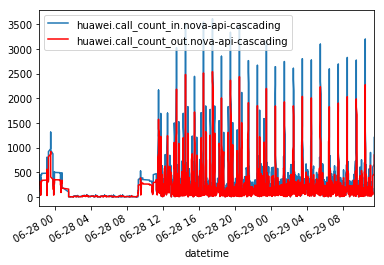

In [74]:
import matplotlib.pyplot as plt

# gca stands for 'get current axis'
ax = plt.gca()

complete_df_copy.plot(kind='line',x='datetime',y='huawei.call_count_in.nova-api-cascading',ax=ax)
complete_df_copy.plot(kind='line',x='datetime',y='huawei.call_count_out.nova-api-cascading', color='red', ax=ax)

plt.show()

In [75]:
complete_df_copy['timestamp'] = complete_df_copy.index

complete_df_copy

,datetime,huawei.call_count.nova-api-cascading,huawei.call_count_in.nova-api-cascading,huawei.call_count_out.nova-api-cascading,huawei.degree.nova-api-cascading,huawei.degree_in.nova-api-cascading,huawei.degree_out.nova-api-cascading,huawei.graph_gain_variance,huawei.graph_loss_variance,huawei.graph_variance,huawei.response_time_avg.nova-api-cascading,huawei.status_code.nova-api-cascading.2XX,huawei.status_code.nova-api-cascading.4XX,huawei.status_code.nova-api-cascading.5XX,timestamp
timestamp,,,,,,,,,,,,,,,
1530137700,2018-06-27 22:15:00,758.000000,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152401.703125,0.280543,0.719457,0.000806,1530137700
1530137700,2018-06-27 22:15:00,703.888889,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152401.703125,0.280543,0.719457,0.000806,1530137700
1530137700,2018-06-27 22:15:00,649.777778,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152502.709961,0.280543,0.719457,0.000806,1530137700
1530137700,2018-06-27 22:15:00,595.666667,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152603.716797,0.280543,0.719457,0.000806,1530137700
1530137700,2018-06-27 22:15:00,541.555556,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152704.723633,0.280543,0.719457,0.000806,1530137700
1530137700,2018-06-27 22:15:00,487.444444,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152805.730469,0.292546,0.719457,0.000806,1530137700
1530137700,2018-06-27 22:15:00,433.333333,450.000000,289.818182,3.0,2.0,1.000000,0.000000,0.0,0.000000,152906.737305,0.304549,0.719457,0.000806,1530137700
1530137700,2018-06-27 22:15:00,379.222222,450.000000,271.636364,3.0,2.0,1.000000,0.000000,0.0,0.000000,153007.744141,0.316552,0.705953,0.000806,1530137700
1530137700,2018-06-27 22:15:00,325.111111,354.333333,253.454545,3.0,2.0,1.000000,0.000000,0.0,0.000000,153108.750977,0.328556,0.692450,0.000806,1530137700


In [77]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

import numpy as np

outliers_fraction = 0.01

def isolation_forest(df, x_val, metric_a, metric_b, metric_c):
    rng = np.random.RandomState(0)

    data = df[[metric_a, metric_b, metric_c]]
    
    print(data)
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(data)
    data = pd.DataFrame(np_scaled)

    model =  IsolationForest(contamination=outliers_fraction, n_jobs=-1, random_state=rng)
    model.fit(data) 
    df['anomaly'] = pd.Series(model.predict(data))

    fig, ax = plt.subplots(figsize=(10,6))
    a = df.loc[df['anomaly'] == -1, [x_val, metric_a]] #anomaly
    
    ax.plot(df[x_val], df[metric_a], color='blue', label='Normal')
    ax.scatter(a[x_val],a[metric_a], color='red', label='Anomaly')
    plt.xlabel('Timestamp')
    plt.ylabel('Call count')
    plt.title('Call Count [IN] Anomalies')
    plt.legend()
    plt.show();
    
    fig, ax = plt.subplots(figsize=(10,6))
    a = df.loc[df['anomaly'] == -1, [x_val, metric_b]] #anomaly
    
    ax.plot(df[x_val], df[metric_b], color='blue', label='Normal')
    ax.scatter(a[x_val],a[metric_b], color='red', label='Anomaly')
    plt.xlabel('Timestamp')
    plt.ylabel('Call count')
    plt.title('Call Count [OUT] Anomalies')
    plt.legend()
    plt.show();
    
    fig, ax = plt.subplots(figsize=(10,6))
    a = df.loc[df['anomaly'] == -1, [x_val, metric_c]] #anomaly
    
    ax.plot(df[x_val], df[metric_c], color='blue', label='Normal')
    #ax.scatter(a[x_val],a[metric_c], color='red', label='Anomaly')
    #plt.xlabel('Timestamp')
    #plt.ylabel('Response time (ms)')
    #plt.title('Average Response Time Anomalies')
    #plt.legend()
    #plt.show();
    
    #anomaly_data = df.loc[df['anomaly'] == -1]
    #print(anomaly_data)

iteration = 0
# for i in range(10):
isolation_forest(complete_df_copy, 'timestamp', 'huawei.call_count_in.nova-api-cascading', 'huawei.call_count_out.nova-api-cascading', 'huawei.response_time_avg.nova-api-cascading')
# iteration += 1

            huawei.call_count_in.nova-api-cascading  \
timestamp                                             
1530137700                               450.000000   
1530137700                               450.000000   
1530137700                               450.000000   
1530137700                               450.000000   
1530137700                               450.000000   
1530137700                               450.000000   
1530137700                               450.000000   
1530137700                               450.000000   
1530137700                               354.333333   
1530138135                               258.666667   
1530138135                               163.000000   
1530138135                               177.937500   
1530138135                               192.875000   
1530138135                               207.812500   
1530138135                               222.750000   
1530138135                               237.687500   
1530138135

In [78]:
def plot_anomalies(df, anomaly_type, feature_1, feature_2, feature_3, x_val):
    fig, ax = plt.subplots(figsize=(10,6))
    a = df.loc[df[anomaly_type] == -1, [x_val, feature_1]] #anomaly
    
    ax.plot(df[x_val], df[feature_1], color='blue', label='Normal')
    ax.scatter(a[x_val],a[feature_1], color='red', label='Anomaly')
    plt.xlabel('Timestamp')
    plt.ylabel('Call count')
    plt.title('Call Count [IN] Anomalies')
    plt.legend()
    
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_minor_locator(hours)
    
    plt.show()
    plt.draw()
    
    fig.savefig('anomalies_call_count_in' + '.svg', format="svg")
    
    fig, ax = plt.subplots(figsize=(10,6))
    a = df.loc[df[anomaly_type] == -1, [x_val, feature_2]] #anomaly
    
    ax.plot(df[x_val], df[feature_2], color='blue', label='Normal')
    ax.scatter(a[x_val],a[feature_2], color='red', label='Anomaly')
    plt.xlabel('Timestamp')
    plt.ylabel('Call count')
    plt.title('Call Count [OUT] Anomalies')
    plt.legend()
    
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_minor_locator(hours)
    
    plt.show()
    plt.draw()
    
    fig.savefig('anomalies_call_count_out' + '.svg', format="svg")
    
    fig, ax = plt.subplots(figsize=(10,6))
    a = df.loc[df[anomaly_type] == -1, [x_val, feature_3]] #anomaly
    
    ax.plot(df[x_val], df[feature_3], color='blue', label='Normal')
    ax.scatter(a[x_val],a[feature_3], color='red', label='Anomaly')
    plt.xlabel('Timestamp')
    plt.ylabel('Response time (ms)')
    plt.title('Average Response Time Anomalies')
    plt.legend()
    
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_minor_locator(hours)
    
    plt.show()
    plt.draw()
    
    #fig.savefig('anomalies_response_time_avg' + '.svg', format="svg")

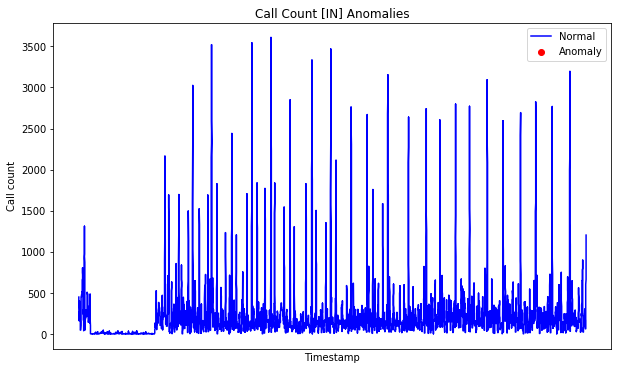

<Figure size 432x288 with 0 Axes>

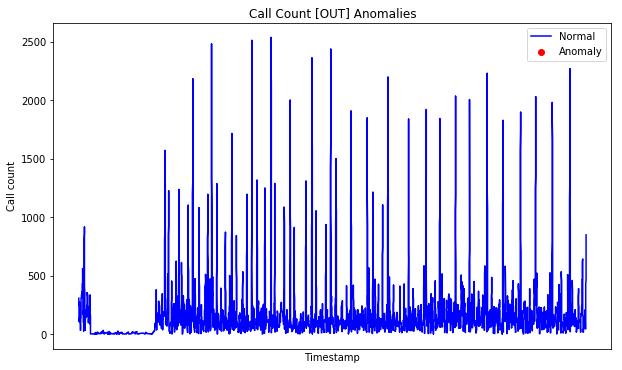

<Figure size 432x288 with 0 Axes>

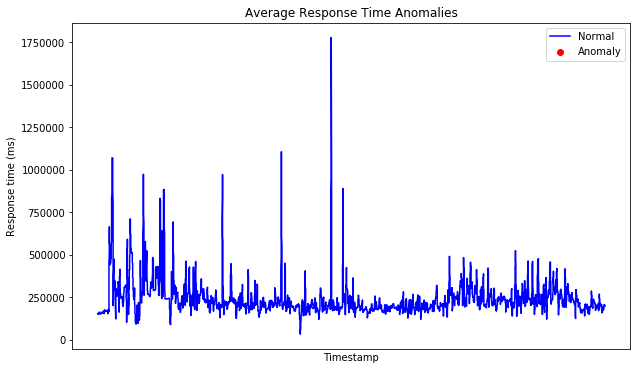

<Figure size 432x288 with 0 Axes>

In [80]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

import matplotlib.dates as mdates

hours = mdates.HourLocator(interval=6)  # every day
dateFmt = mdates.DateFormatter('%d %H')

def one_class_svm(df, x_val, feature_1, feature_2, feature_3):
    data = df[[feature_1, feature_2, feature_3]]
    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(data)
    data = pd.DataFrame(np_scaled)
    # train oneclassSVM 
    model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
    model.fit(data)
    df['anomaly_svm'] = pd.Series(model.predict(data))

    plot_anomalies(df, 'anomaly_svm', feature_1, feature_2, feature_3, x_val)
    
    # Print anomaly detected in isolation forests algorithm
    anomaly_data = df.loc[df['anomaly_svm'] == -1]
    anomaly_values = anomaly_data[[x_val, feature_1, feature_2, feature_3]]
    #with open('one_class_svm_values_output_1.txt', 'a+') as file:
    #    file.write('test_{}:\n'.format(iteration))
    #    file.write(str(anomaly_values))
    #    file.write('\n\n\n')

    #print(anomaly_values)

#iteration = 0
one_class_svm(complete_df_copy, 'timestamp', 'huawei.call_count_in.nova-api-cascading', 'huawei.call_count_out.nova-api-cascading', 'huawei.response_time_avg.nova-api-cascading')


In [81]:
complete_df_copy

,datetime,huawei.call_count.nova-api-cascading,huawei.call_count_in.nova-api-cascading,huawei.call_count_out.nova-api-cascading,huawei.degree.nova-api-cascading,huawei.degree_in.nova-api-cascading,huawei.degree_out.nova-api-cascading,huawei.graph_gain_variance,huawei.graph_loss_variance,huawei.graph_variance,huawei.response_time_avg.nova-api-cascading,huawei.status_code.nova-api-cascading.2XX,huawei.status_code.nova-api-cascading.4XX,huawei.status_code.nova-api-cascading.5XX,timestamp,anomaly,anomaly_svm
timestamp,,,,,,,,,,,,,,,,,
1530137700,2018-06-27 22:15:00,758.000000,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152401.703125,0.280543,0.719457,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,703.888889,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152401.703125,0.280543,0.719457,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,649.777778,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152502.709961,0.280543,0.719457,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,595.666667,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152603.716797,0.280543,0.719457,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,541.555556,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152704.723633,0.280543,0.719457,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,487.444444,450.000000,308.000000,3.0,2.0,1.000000,0.000000,0.0,0.000000,152805.730469,0.292546,0.719457,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,433.333333,450.000000,289.818182,3.0,2.0,1.000000,0.000000,0.0,0.000000,152906.737305,0.304549,0.719457,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,379.222222,450.000000,271.636364,3.0,2.0,1.000000,0.000000,0.0,0.000000,153007.744141,0.316552,0.705953,0.000806,1530137700,NaN,NaN
1530137700,2018-06-27 22:15:00,325.111111,354.333333,253.454545,3.0,2.0,1.000000,0.000000,0.0,0.000000,153108.750977,0.328556,0.692450,0.000806,1530137700,NaN,NaN
